In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Bidirectional ,LSTM , Dense , Dropout,RNN,GRU,CuDNNLSTM
from keras.optimizers import Adam
from sklearn import preprocessing

Using TensorFlow backend.


# 90 frame  with confidence

In [5]:
safe=pd.read_csv('.//train//combined_90_safe.csv')
unsafe=pd.read_csv('.//train//combined_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/90),90,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)
X_train=dataa
y_train=labels

safe_shape: (31320, 52) 348 個1
unsafe_shape: (28170, 52) 313 個0
all_data_shape: (59490, 52)
all_data_shape_reshape: (661, 90, 51)
unsafe_label_shape (313, 1)
safe_label_shape (348, 1)


In [6]:
#okokokokokkokokkookok

safe=pd.read_csv('.//test//90safe_test.csv')
unsafe=pd.read_csv('.//test//90unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/90),90,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (12060, 52) 134 個1
unsafe_shape: (6750, 52) 75 個0
all_data_shape: (18810, 52)
all_data_shape_reshape: (209, 90, 51)
unsafe_label_shape (75, 1)
safe_label_shape (134, 1)
(209, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
Name: label, Length: 209, dtype: float64


In [7]:
model_lstm=Sequential()

In [8]:
model_lstm.add(LSTM(10,stateful=True,activation='tanh',batch_input_shape=(1,None,51)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(2,activation='softmax'))
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 10)                   2480      
_________________________________________________________________
dropout_1 (Dropout)          (1, 10)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    22        
Total params: 2,502
Trainable params: 2,502
Non-trainable params: 0
_________________________________________________________________


Train on 661 samples, validate on 209 samples
Epoch 1/50
661/661 [==============================] - 36s 55ms/step - loss: 0.5420 - acc: 0.7655 - val_loss: 0.7436 - val_acc: 0.6364
Epoch 2/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6556 - acc: 0.6520 - val_loss: 0.6644 - val_acc: 0.7033
Epoch 3/50
661/661 [==============================] - 34s 51ms/step - loss: 0.6729 - acc: 0.6172 - val_loss: 0.6238 - val_acc: 0.6938
Epoch 4/50
661/661 [==============================] - 34s 51ms/step - loss: 0.6671 - acc: 0.6127 - val_loss: 0.6187 - val_acc: 0.6938
Epoch 5/50
661/661 [==============================] - 34s 51ms/step - loss: 0.6749 - acc: 0.5855 - val_loss: 0.6111 - val_acc: 0.6986
Epoch 6/50
661/661 [==============================] - 34s 51ms/step - loss: 0.6494 - acc: 0.5840 - val_loss: 0.6144 - val_acc: 0.6986
Epoch 7/50
661/661 [==============================] - 34s 51ms/step - loss: 0.6442 - acc: 0.6082 - val_loss: 0.6193 - val_acc: 0.6986
Epoch 8/50
661/6

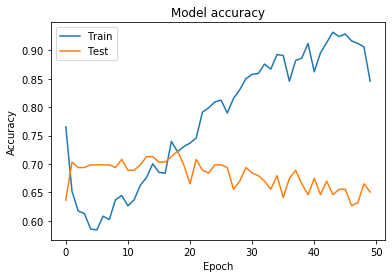

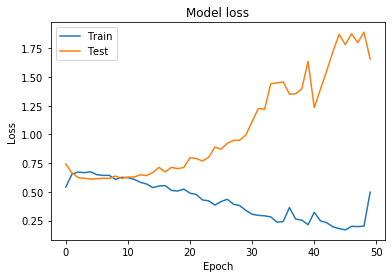

In [10]:
batch_size = 1
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm.save('90withConLstm.h5')

#  90 frame  without confidence

In [2]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_90_safe.csv')
unsafe=pd.read_csv('.//train//combined_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/90),90,34)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)
X_train=dataa
y_train=labels

safe_shape: (31320, 52) 348 個1
unsafe_shape: (28170, 52) 313 個0
all_data_shape: (59490, 35)
all_data_shape_reshape: (661, 90, 34)
unsafe_label_shape (313, 1)
safe_label_shape (348, 1)


In [3]:
#okokokokokkokokkookok

safe=pd.read_csv('.//test//90safe_test.csv')
unsafe=pd.read_csv('.//test//90unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/90),90,34)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (12060, 52) 134 個1
unsafe_shape: (6750, 52) 75 個0
all_data_shape: (18810, 35)
all_data_shape_reshape: (209, 90, 34)
unsafe_label_shape (75, 1)
safe_label_shape (134, 1)
(209, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
Name: label, Length: 209, dtype: float64


In [4]:
model_lstm_without=Sequential()

In [5]:
model_lstm_without.add(LSTM(10,stateful=True,activation='tanh',batch_input_shape=(1,None,34)))
model_lstm_without.add(Dropout(0.2))
model_lstm_without.add(Dense(2,activation='softmax'))
model_lstm_without.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 10)                   1800      
_________________________________________________________________
dropout_1 (Dropout)          (1, 10)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    22        
Total params: 1,822
Trainable params: 1,822
Non-trainable params: 0
_________________________________________________________________


Train on 661 samples, validate on 209 samples
Epoch 1/50
661/661 [==============================] - 36s 54ms/step - loss: 0.7192 - acc: 0.4932 - val_loss: 0.6320 - val_acc: 0.6364
Epoch 2/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6876 - acc: 0.5598 - val_loss: 0.6489 - val_acc: 0.5981
Epoch 3/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6826 - acc: 0.5688 - val_loss: 0.6596 - val_acc: 0.5263
Epoch 4/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6721 - acc: 0.5643 - val_loss: 0.6406 - val_acc: 0.5455
Epoch 5/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6564 - acc: 0.5961 - val_loss: 0.6306 - val_acc: 0.6411
Epoch 6/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6669 - acc: 0.5794 - val_loss: 0.6341 - val_acc: 0.6220
Epoch 7/50
661/661 [==============================] - 34s 52ms/step - loss: 0.6465 - acc: 0.6036 - val_loss: 0.6184 - val_acc: 0.6220
Epoch 8/50
661/6

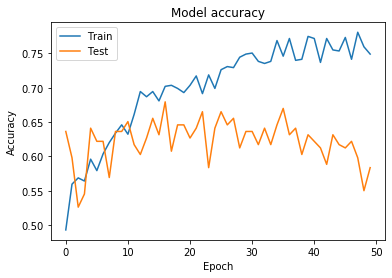

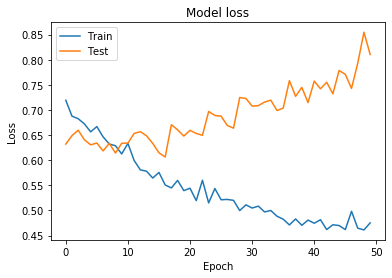

In [6]:
batch_size = 1
model_lstm_without.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm_without.fit(X_train,y_train,epochs=50,batch_size=batch_size,validation_data=(X_test, y_test),)

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm_without.save('90withoutConLstm.h5')

# 90 frame Bidirectional LSTM with confidence

In [7]:
safe=pd.read_csv('.//train//combined_90_safe.csv')
unsafe=pd.read_csv('.//train//combined_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/90),90,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)
X_train=dataa
y_train=labels

safe_shape: (31320, 52) 348 個1
unsafe_shape: (28170, 52) 313 個0
all_data_shape: (59490, 52)
all_data_shape_reshape: (661, 90, 51)
unsafe_label_shape (313, 1)
safe_label_shape (348, 1)


In [8]:
#okokokokokkokokkookok

safe=pd.read_csv('.//test//90safe_test.csv')
unsafe=pd.read_csv('.//test//90unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/90),90,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (12060, 52) 134 個1
unsafe_shape: (6750, 52) 75 個0
all_data_shape: (18810, 52)
all_data_shape_reshape: (209, 90, 51)
unsafe_label_shape (75, 1)
safe_label_shape (134, 1)
(209, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
Name: label, Length: 209, dtype: float64


In [9]:
model_90_Bi = Sequential()
model_90_Bi.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(90, 51)))
model_90_Bi.add(Bidirectional(LSTM(5)))
model_90_Bi.add(Dense(2))
model_90_Bi.add(Activation('sigmoid'))
#model_90_Bi.compile(loss='binary_crossentropy', optimizer='rmsprop')
model_90_Bi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 90, 34)            9384      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10)                1600      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 11,006
Trainable params: 11,006
Non-trainable params: 0
_________________________________________________________________


Train on 661 samples, validate on 209 samples
Epoch 1/50
661/661 [==============================] - 190s 287ms/step - loss: 0.5293 - acc: 0.7988 - val_loss: 0.7405 - val_acc: 0.6435
Epoch 2/50
661/661 [==============================] - 189s 285ms/step - loss: 0.6383 - acc: 0.6604 - val_loss: 0.7581 - val_acc: 0.6411
Epoch 3/50
661/661 [==============================] - 188s 284ms/step - loss: 0.5500 - acc: 0.7572 - val_loss: 0.7985 - val_acc: 0.6411
Epoch 4/50
661/661 [==============================] - 187s 284ms/step - loss: 0.6809 - acc: 0.6369 - val_loss: 0.7235 - val_acc: 0.6411
Epoch 5/50
661/661 [==============================] - 188s 284ms/step - loss: 0.7202 - acc: 0.5772 - val_loss: 0.6697 - val_acc: 0.6411
Epoch 6/50
661/661 [==============================] - 187s 283ms/step - loss: 0.6866 - acc: 0.5787 - val_loss: 0.6239 - val_acc: 0.7057
Epoch 7/50
661/661 [==============================] - 187s 283ms/step - loss: 0.6789 - acc: 0.5855 - val_loss: 0.6297 - val_acc: 0.6914
Ep

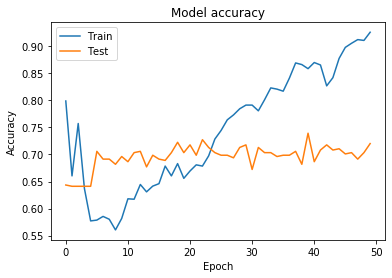

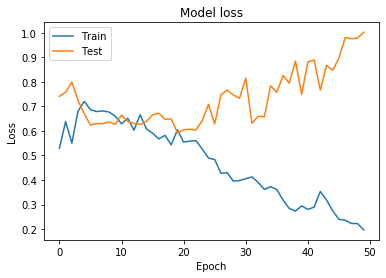

In [10]:
batch_size = 1
model_90_Bi.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_90_Bi.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_90_Bi.save('90withConBi.h5')

# 90 frame Bidirectional LSTM without confidence

In [15]:
safe=pd.read_csv('.//train//combined_90_safe.csv')
unsafe=pd.read_csv('.//train//combined_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/90),90,34)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)
X_train=dataa
y_train=labels

safe_shape: (31320, 52) 348 個1
unsafe_shape: (28170, 52) 313 個0
all_data_shape: (59490, 35)
all_data_shape_reshape: (661, 90, 34)
unsafe_label_shape (313, 1)
safe_label_shape (348, 1)


In [16]:
#okokokokokkokokkookok

safe=pd.read_csv('.//test//90safe_test.csv')
unsafe=pd.read_csv('.//test//90unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//90)*90]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//90,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//90)*90]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//90,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/90),90,34)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//90)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//90)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (12060, 52) 134 個1
unsafe_shape: (6750, 52) 75 個0
all_data_shape: (18810, 35)
all_data_shape_reshape: (209, 90, 34)
unsafe_label_shape (75, 1)
safe_label_shape (134, 1)
(209, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
Name: label, Length: 209, dtype: float64


In [17]:
model_90_Bi_out = Sequential()
model_90_Bi_out.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(90, 34)))
model_90_Bi_out.add(Bidirectional(LSTM(5)))
model_90_Bi_out.add(Dense(2))
model_90_Bi_out.add(Activation('sigmoid'))
#model_90_Bi_out.compile(loss='binary_crossentropy', optimizer='rmsprop')
model_90_Bi_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 90, 34)            7072      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10)                1600      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 8,694
Trainable params: 8,694
Non-trainable params: 0
_________________________________________________________________


Train on 661 samples, validate on 209 samples
Epoch 1/50
661/661 [==============================] - 190s 287ms/step - loss: 0.4613 - acc: 0.8707 - val_loss: 0.8707 - val_acc: 0.6411
Epoch 2/50
661/661 [==============================] - 188s 284ms/step - loss: 0.6201 - acc: 0.7156 - val_loss: 0.7913 - val_acc: 0.6411
Epoch 3/50
661/661 [==============================] - 188s 284ms/step - loss: 0.5772 - acc: 0.7277 - val_loss: 0.7921 - val_acc: 0.6459
Epoch 4/50
661/661 [==============================] - 187s 283ms/step - loss: 0.7024 - acc: 0.6006 - val_loss: 0.7375 - val_acc: 0.6411
Epoch 5/50
661/661 [==============================] - 188s 284ms/step - loss: 0.6864 - acc: 0.6089 - val_loss: 0.6783 - val_acc: 0.6411
Epoch 6/50
661/661 [==============================] - 188s 285ms/step - loss: 0.5894 - acc: 0.7073 - val_loss: 0.7325 - val_acc: 0.6579
Epoch 7/50
661/661 [==============================] - 187s 283ms/step - loss: 0.6570 - acc: 0.6611 - val_loss: 0.6750 - val_acc: 0.6507
Ep

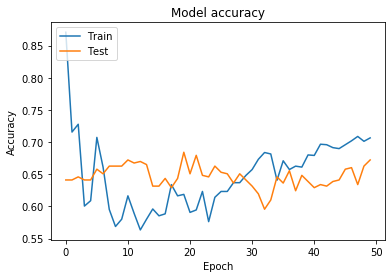

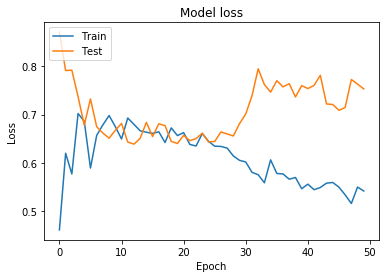

In [18]:
batch_size = 1
model_90_Bi_out.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_90_Bi_out.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_90_Bi_out.save('90withConBi_out.h5')

# 60 frame with confidence

In [19]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_60_safe.csv')
unsafe=pd.read_csv('.//train//combined_60_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/60),60,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//60safe_test.csv')
unsafe=pd.read_csv('.//test//60unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/60),60,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (32520, 52) 542 個1
unsafe_shape: (29520, 52) 492 個0
all_data_shape: (62040, 52)
all_data_shape_reshape: (1034, 60, 51)
unsafe_label_shape (492, 1)
safe_label_shape (542, 1)
safe_shape: (12480, 52) 208 個1
unsafe_shape: (7260, 52) 121 個0
all_data_shape: (19740, 52)
all_data_shape_reshape: (329, 60, 51)
unsafe_label_shape (121, 1)
safe_label_shape (208, 1)
(329, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
Name: label, Length: 329, dtype: float64


In [20]:
model_lstm_60=Sequential()

In [21]:
model_lstm_60.add(LSTM(10,stateful=True,activation='tanh',batch_input_shape=(1,None,51)))
model_lstm_60.add(Dropout(0.2))
model_lstm_60.add(Dense(2,activation='softmax'))
model_lstm_60.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (1, 10)                   2480      
_________________________________________________________________
dropout_2 (Dropout)          (1, 10)                   0         
_________________________________________________________________
dense_5 (Dense)              (1, 2)                    22        
Total params: 2,502
Trainable params: 2,502
Non-trainable params: 0
_________________________________________________________________


Train on 1034 samples, validate on 329 samples
Epoch 1/50
1034/1034 [==============================] - 37s 36ms/step - loss: 0.4626 - acc: 0.8327 - val_loss: 0.7500 - val_acc: 0.6322
Epoch 2/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.5401 - acc: 0.7544 - val_loss: 0.7692 - val_acc: 0.6292
Epoch 3/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.5136 - acc: 0.7650 - val_loss: 0.7465 - val_acc: 0.6626
Epoch 4/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4670 - acc: 0.8114 - val_loss: 0.7929 - val_acc: 0.6778
Epoch 5/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4556 - acc: 0.7940 - val_loss: 0.7700 - val_acc: 0.6809
Epoch 6/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4413 - acc: 0.8095 - val_loss: 0.7740 - val_acc: 0.6474
Epoch 7/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4018 - acc: 0.8327 - val_loss: 0.6934 - val_acc: 0.6535
E

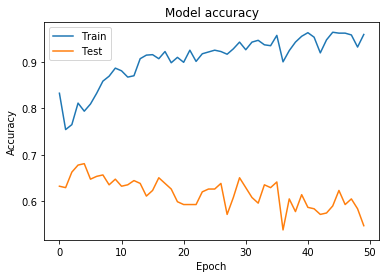

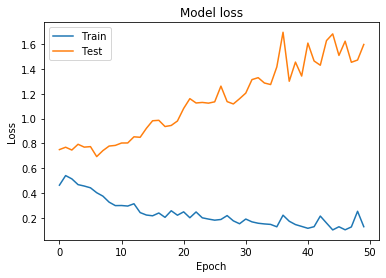

In [22]:
batch_size = 1
model_lstm_60.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm_60.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm_60.save('60withConLstm.h5')

# 60 frame without confidence

In [23]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_60_safe.csv')
unsafe=pd.read_csv('.//train//combined_60_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/60),60,34)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//60safe_test.csv')
unsafe=pd.read_csv('.//test//60unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/60),60,34)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (32520, 52) 542 個1
unsafe_shape: (29520, 52) 492 個0
all_data_shape: (62040, 35)
all_data_shape_reshape: (1034, 60, 34)
unsafe_label_shape (492, 1)
safe_label_shape (542, 1)
safe_shape: (12480, 52) 208 個1
unsafe_shape: (7260, 52) 121 個0
all_data_shape: (19740, 35)
all_data_shape_reshape: (329, 60, 34)
unsafe_label_shape (121, 1)
safe_label_shape (208, 1)
(329, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
Name: label, Length: 329, dtype: float64


In [24]:
model_lstm_60out=Sequential()

In [25]:
model_lstm_60out.add(LSTM(10,stateful=True,activation='tanh',batch_input_shape=(1,None,34)))
#model_lstm.add(LSTM(16))
model_lstm_60out.add(Dropout(0.2))
#lastm 16
#model_lstm.add(LSTM(16))
model_lstm_60out.add(Dense(2,activation='softmax'))
model_lstm_60out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (1, 10)                   1800      
_________________________________________________________________
dropout_3 (Dropout)          (1, 10)                   0         
_________________________________________________________________
dense_6 (Dense)              (1, 2)                    22        
Total params: 1,822
Trainable params: 1,822
Non-trainable params: 0
_________________________________________________________________


Train on 1034 samples, validate on 329 samples
Epoch 1/50
1034/1034 [==============================] - 37s 36ms/step - loss: 0.3529 - acc: 0.8820 - val_loss: 1.0134 - val_acc: 0.6322
Epoch 2/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.5249 - acc: 0.7756 - val_loss: 0.8999 - val_acc: 0.6322
Epoch 3/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.5139 - acc: 0.7843 - val_loss: 0.8682 - val_acc: 0.6322
Epoch 4/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.5357 - acc: 0.7573 - val_loss: 0.8493 - val_acc: 0.6322
Epoch 5/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4904 - acc: 0.7853 - val_loss: 0.9173 - val_acc: 0.6261
Epoch 6/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4701 - acc: 0.7988 - val_loss: 0.9335 - val_acc: 0.6140
Epoch 7/50
1034/1034 [==============================] - 36s 35ms/step - loss: 0.4421 - acc: 0.8075 - val_loss: 0.9960 - val_acc: 0.5927
E

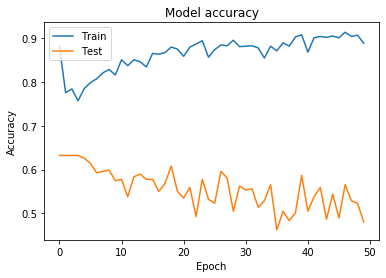

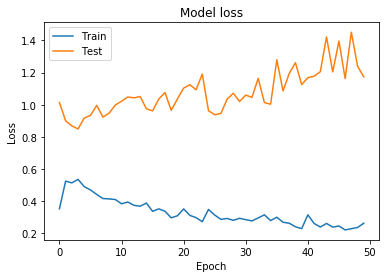

In [26]:
batch_size = 1
model_lstm_60out.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm_60out.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm_60out.save('60withoutConLstm.h5')

In [ ]:
# 60 frame with confidence bid

In [27]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_60_safe.csv')
unsafe=pd.read_csv('.//train//combined_60_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/60),60,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//60safe_test.csv')
unsafe=pd.read_csv('.//test//60unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/60),60,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (32520, 52) 542 個1
unsafe_shape: (29520, 52) 492 個0
all_data_shape: (62040, 52)
all_data_shape_reshape: (1034, 60, 51)
unsafe_label_shape (492, 1)
safe_label_shape (542, 1)
safe_shape: (12480, 52) 208 個1
unsafe_shape: (7260, 52) 121 個0
all_data_shape: (19740, 52)
all_data_shape_reshape: (329, 60, 51)
unsafe_label_shape (121, 1)
safe_label_shape (208, 1)
(329, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
Name: label, Length: 329, dtype: float64


In [28]:
model_60_Bi = Sequential()
model_60_Bi.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(60, 51)))
model_60_Bi.add(Bidirectional(LSTM(5)))
model_60_Bi.add(Dense(2))
model_60_Bi.add(Activation('sigmoid'))
#model_90_Bi.compile(loss='binary_crossentropy', optimizer='rmsprop')
model_60_Bi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 60, 34)            9384      
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10)                1600      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 11,006
Trainable params: 11,006
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 1
model_60_Bi.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_60_Bi.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_60_Bi.save('60withConBi.h5')

Train on 1034 samples, validate on 329 samples
Epoch 1/50
1034/1034 [==============================] - 197s 190ms/step - loss: 0.3189 - acc: 0.9120 - val_loss: 1.1474 - val_acc: 0.6322
Epoch 2/50
1034/1034 [==============================] - 194s 188ms/step - loss: 0.4676 - acc: 0.8167 - val_loss: 0.9641 - val_acc: 0.6322
Epoch 3/50
1034/1034 [==============================] - 195s 188ms/step - loss: 0.4952 - acc: 0.8013 - val_loss: 0.9945 - val_acc: 0.6337
Epoch 4/50
1034/1034 [==============================] - 194s 188ms/step - loss: 0.4978 - acc: 0.7853 - val_loss: 0.9604 - val_acc: 0.6824
Epoch 5/50
1034/1034 [==============================] - 194s 187ms/step - loss: 0.4437 - acc: 0.8162 - val_loss: 0.9513 - val_acc: 0.6945
Epoch 6/50
1034/1034 [==============================] - 194s 188ms/step - loss: 0.4341 - acc: 0.8182 - val_loss: 0.9139 - val_acc: 0.6945
Epoch 7/50
1034/1034 [==============================] - 196s 190ms/step - loss: 0.4066 - acc: 0.8366 - val_loss: 0.9183 - val

In [ ]:
# 60 frame without confidence bid

In [ ]:
safe=pd.read_csv('.//train//combined_60_safe.csv')
unsafe=pd.read_csv('.//train//combined_60_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/60),60,34)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//60safe_test.csv')
unsafe=pd.read_csv('.//test//60unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//60)*60]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//60,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//60)*60]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//60,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/60),60,34)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//60)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//60)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

In [ ]:
model_60_Bi_out = Sequential()
model_60_Bi_out.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(60, 34)))
model_60_Bi_out.add(Bidirectional(LSTM(5)))
model_60_Bi_out.add(Dense(2))
model_60_Bi_out.add(Activation('sigmoid'))
#model_90_Bi.compile(loss='binary_crossentropy', optimizer='rmsprop')
model_60_Bi_out.summary()

In [ ]:
batch_size = 1
model_60_Bi_out.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_60_Bi_out.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_60_Bi_out.save('60withoutConBi.h5')

# 30 frame with confidence

In [10]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_30_safe.csv')
unsafe=pd.read_csv('.//train//combined_30_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/30),30,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//30safe_test.csv')
unsafe=pd.read_csv('.//test//30unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/30),30,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (33780, 52) 1126 個1
unsafe_shape: (30750, 52) 1025 個0
all_data_shape: (64530, 52)
all_data_shape_reshape: (2151, 30, 51)
unsafe_label_shape (1025, 1)
safe_label_shape (1126, 1)
safe_shape: (12870, 52) 429 個1
unsafe_shape: (7530, 52) 251 個0
all_data_shape: (20400, 52)
all_data_shape_reshape: (680, 30, 51)
unsafe_label_shape (251, 1)
safe_label_shape (429, 1)
(680, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
424    1.0
425    1.0
426    1.0
427    1.0
428    1.0
Name: label, Length: 680, dtype: float64


In [11]:
model_lstm=Sequential()

In [12]:
model_lstm.add(LSTM(10,stateful=True,activation='tanh',batch_input_shape=(1,None,51)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(2,activation='softmax'))
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 10)                   2480      
_________________________________________________________________
dropout_3 (Dropout)          (1, 10)                   0         
_________________________________________________________________
dense_3 (Dense)              (1, 2)                    22        
Total params: 2,502
Trainable params: 2,502
Non-trainable params: 0
_________________________________________________________________


Train on 2151 samples, validate on 680 samples
Epoch 1/50
2151/2151 [==============================] - 40s 18ms/step - loss: 0.2403 - acc: 0.9256 - val_loss: 1.3721 - val_acc: 0.6309
Epoch 2/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.4841 - acc: 0.8015 - val_loss: 1.1512 - val_acc: 0.6294
Epoch 3/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.4566 - acc: 0.7954 - val_loss: 1.1720 - val_acc: 0.6353
Epoch 4/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.4865 - acc: 0.7796 - val_loss: 1.0496 - val_acc: 0.6309
Epoch 5/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.4908 - acc: 0.7680 - val_loss: 0.9106 - val_acc: 0.6706
Epoch 6/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.5060 - acc: 0.7634 - val_loss: 1.0793 - val_acc: 0.6309
Epoch 7/50
2151/2151 [==============================] - 39s 18ms/step - loss: 0.4981 - acc: 0.7541 - val_loss: 1.0781 - val_acc: 0.6324
E

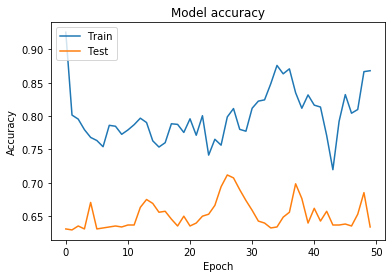

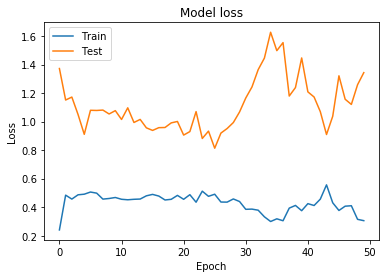

In [13]:
batch_size = 1
model_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_lstm.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm.save('90withConLstm.h5')

# 30 frame without confidence

In [7]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_30_safe.csv')
unsafe=pd.read_csv('.//train//combined_30_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/30),30,34)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//30safe_test.csv')
unsafe=pd.read_csv('.//test//30unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/30),30,34)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (33780, 52) 1126 個1
unsafe_shape: (30750, 52) 1025 個0
all_data_shape: (64530, 35)
all_data_shape_reshape: (2151, 30, 34)
unsafe_label_shape (1025, 1)
safe_label_shape (1126, 1)
safe_shape: (12870, 52) 429 個1
unsafe_shape: (7530, 52) 251 個0
all_data_shape: (20400, 35)
all_data_shape_reshape: (680, 30, 34)
unsafe_label_shape (251, 1)
safe_label_shape (429, 1)
(680, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
424    1.0
425    1.0
426    1.0
427    1.0
428    1.0
Name: label, Length: 680, dtype: float64


In [14]:
model_lstm=Sequential()

In [62]:
model_lstm.add(LSTM(10,stateful=False,activation='tanh',batch_input_shape=(1,None,34)))

model_lstm.add(Dense(2,activation='softmax'))
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (1, 10)                   1800      
_________________________________________________________________
dense_16 (Dense)             (1, 2)                    22        
Total params: 1,822
Trainable params: 1,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 1
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm.save('90withConLstm.h5')

Train on 2151 samples, validate on 680 samples
Epoch 1/50
2151/2151 [==============================] - 41s 19ms/step - loss: 0.1768 - acc: 0.9540 - val_loss: 1.6541 - val_acc: 0.6309
Epoch 2/50
2151/2151 [==============================] - 40s 19ms/step - loss: 0.3840 - acc: 0.8457 - val_loss: 1.3294 - val_acc: 0.6309
Epoch 3/50
2151/2151 [==============================] - 40s 19ms/step - loss: 0.3591 - acc: 0.8601 - val_loss: 1.2906 - val_acc: 0.6397
Epoch 4/50
2151/2151 [==============================] - 40s 19ms/step - loss: 0.3582 - acc: 0.8615 - val_loss: 1.3232 - val_acc: 0.6324
Epoch 5/50
2151/2151 [==============================] - 40s 18ms/step - loss: 0.3423 - acc: 0.8661 - val_loss: 1.4218 - val_acc: 0.6265
Epoch 6/50
2151/2151 [==============================] - 40s 19ms/step - loss: 0.3475 - acc: 0.8647 - val_loss: 1.4406 - val_acc: 0.6294
Epoch 7/50
2151/2151 [==============================] - 40s 19ms/step - loss: 0.3201 - acc: 0.8787 - val_loss: 1.3558 - val_acc: 0.6309
E

In [45]:
batch_size

2151

In [46]:
X_train.shape

(2151, 30, 34)

In [47]:
y_train.shape

(2151, 2)

In [48]:
X_test.shape

(680, 30, 34)

In [ ]:
#30frame with conf bi

In [2]:
#okokokokokkokokkookok

safe=pd.read_csv('.//train//combined_30_safe.csv')
unsafe=pd.read_csv('.//train//combined_30_unsafe.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataa=preprocessing.scale(alldata)
dataa=dataa.reshape(int(alldata.shape[0]/30),30,51)
print('all_data_shape_reshape:',dataa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
labels=alldata_label['label']
labels=to_categorical(labels)

X_train=dataa
y_train=labels

#okokokokokkokokkookok

safe=pd.read_csv('.//test//30safe_test.csv')
unsafe=pd.read_csv('.//test//30unsafe_test.csv')

safe=safe[safe['num']==0]
unsafe=unsafe[unsafe['num']==0]

safe=safe[0:(len(safe[safe['num']==0])//30)*30]#348 1
print('safe_shape:',safe.shape,len(safe[safe['num']==0])//30,'個1')
unsafe=unsafe[0:(len(unsafe[unsafe['num']==0])//30)*30]#313 0
print('unsafe_shape:',unsafe.shape,len(unsafe[unsafe['num']==0])//30,'個0')

#combine dataframe
alldata = pd.concat([unsafe,safe],axis=0)
#alldata=alldata.drop(['a3','b3','c3','d3','e3','f3','g3','h3','i3','j3','k3','l3','m3','n3','o3','p3','q3'],axis=1)
print('all_data_shape:',alldata.shape)
del alldata['num']
#normalization
dataaa=preprocessing.scale(alldata)
dataaa=dataaa.reshape(int(alldata.shape[0]/30),30,51)
print('all_data_shape_reshape:',dataaa.shape)

#label combine
#safe data加入labels
zero=pd.DataFrame()
a_0=np.zeros(len(unsafe[unsafe['num']==0])//30)
a_0.dtype
zero['label']=a_0
print('unsafe_label_shape',zero.shape)


one=pd.DataFrame()
a_1=np.ones(len(safe[safe['num']==0])//30)
a_1.dtype
one['label']=a_1
print('safe_label_shape',one.shape)


alldata_label = pd.concat([zero,one],axis=0)
print(alldata_label.shape)
labelss=alldata_label['label']
print(labelss)
labelss=to_categorical(labelss)

X_test=dataaa
y_test=labelss

safe_shape: (33780, 52) 1126 個1
unsafe_shape: (30750, 52) 1025 個0
all_data_shape: (64530, 52)
all_data_shape_reshape: (2151, 30, 51)
unsafe_label_shape (1025, 1)
safe_label_shape (1126, 1)
safe_shape: (12870, 52) 429 個1
unsafe_shape: (7530, 52) 251 個0
all_data_shape: (20400, 52)
all_data_shape_reshape: (680, 30, 51)
unsafe_label_shape (251, 1)
safe_label_shape (429, 1)
(680, 1)
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
424    1.0
425    1.0
426    1.0
427    1.0
428    1.0
Name: label, Length: 680, dtype: float64


In [3]:
model = Sequential()
model.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(30, 51)))
model.add(Bidirectional(LSTM(5)))
model.add(Dense(2))
model.add(Activation('sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 30, 34)            9384      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 11,006
Trainable params: 11,006
Non-trainable params: 0
_________________________________________________________________


Train on 2151 samples, validate on 680 samples
Epoch 1/50
2151/2151 [==============================] - 204s 95ms/step - loss: 0.1607 - acc: 0.9698 - val_loss: 1.5323 - val_acc: 0.6301
Epoch 2/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3721 - acc: 0.8480 - val_loss: 1.2882 - val_acc: 0.6309
Epoch 3/50
2151/2151 [==============================] - 199s 93ms/step - loss: 0.3391 - acc: 0.8645 - val_loss: 1.2762 - val_acc: 0.6397
Epoch 4/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3504 - acc: 0.8768 - val_loss: 1.0995 - val_acc: 0.6868
Epoch 5/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3270 - acc: 0.8815 - val_loss: 0.9944 - val_acc: 0.6926
Epoch 6/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3343 - acc: 0.8684 - val_loss: 1.0752 - val_acc: 0.6706
Epoch 7/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3303 - acc: 0.8775 - val_loss: 1.1885 - val_acc: 0

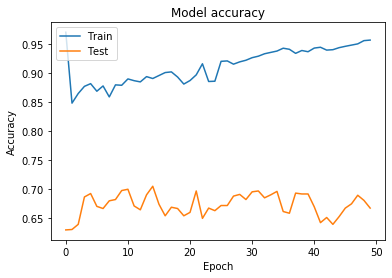

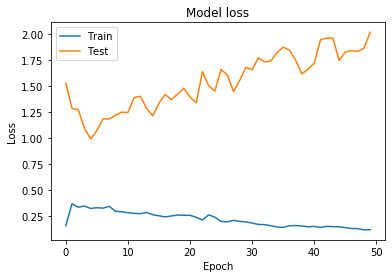

NameError: name 'model_lstm' is not defined

In [4]:
#30frame without conf bi
batch_size = 1
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm.save('90withConLstm.h5')

In [ ]:
#30frame without conf bi

In [23]:
model = Sequential()
model.add(Bidirectional(LSTM(17, return_sequences=True),
                        input_shape=(30, 34)))
model.add(Bidirectional(LSTM(5)))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_19 (Bidirectio (None, 30, 34)            7072      
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 10)                1600      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
Total params: 8,694
Trainable params: 8,694
Non-trainable params: 0
_________________________________________________________________


Train on 2151 samples, validate on 680 samples
Epoch 1/50
2151/2151 [==============================] - 203s 94ms/step - loss: 0.1639 - acc: 0.9698 - val_loss: 1.6192 - val_acc: 0.6309
Epoch 2/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3056 - acc: 0.9049 - val_loss: 1.1772 - val_acc: 0.6309
Epoch 3/50
2151/2151 [==============================] - 201s 94ms/step - loss: 0.3685 - acc: 0.8561 - val_loss: 1.1488 - val_acc: 0.6574
Epoch 4/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3461 - acc: 0.8573 - val_loss: 1.3546 - val_acc: 0.6471
Epoch 5/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3832 - acc: 0.8275 - val_loss: 1.1470 - val_acc: 0.6515
Epoch 6/50
2151/2151 [==============================] - 200s 93ms/step - loss: 0.3065 - acc: 0.8835 - val_loss: 1.1362 - val_acc: 0.6706
Epoch 7/50
2151/2151 [==============================] - 201s 93ms/step - loss: 0.3180 - acc: 0.8705 - val_loss: 0.9770 - val_acc: 0

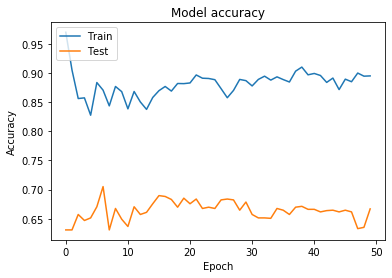

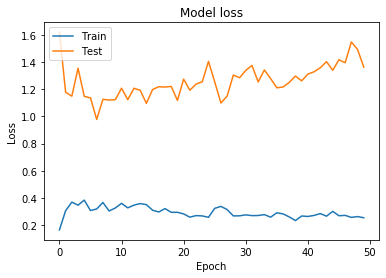

NotImplementedError: 

In [24]:
#30frame without conf bi
batch_size = 1
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,shuffle=False,batch_size=batch_size,validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model_lstm.save('90withConLstm.h5')